In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# wine example
in this case i want to know what are the most important variables to categorise my wine data with all the variables that i have of my wine

## Reading the data
from the data we can see many variables that make up a wine like its alcohol percentage and chloride level.
to use pca we dont need the type wine. that can be added later in the scatter plot.

In [3]:
df = pd.read_csv("wine.csv")
df.head()

,Type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,R,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,R,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,R,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,R,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,R,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## step 1 standardization
there is a large difference in ranges in this dataset. therefor each variable will be standardized so that they will all contribute equally.


In [20]:
data = df.values[:, 1:12].astype('float')
centered = data - data.mean(axis=0)
zscores = centered / centered.std(axis=0)
data

array([[ 7.4 ,  0.7 ,  0.  , ...,  3.51,  0.56,  9.4 ],
       [ 7.8 ,  0.88,  0.  , ...,  3.2 ,  0.68,  9.8 ],
       [ 7.8 ,  0.76,  0.04, ...,  3.26,  0.65,  9.8 ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  2.99,  0.46,  9.4 ],
       [ 5.5 ,  0.29,  0.3 , ...,  3.34,  0.38, 12.8 ],
       [ 6.  ,  0.21,  0.38, ...,  3.26,  0.32, 11.8 ]])

## step 2 covariance matrix computation
This step we are looking if there are any relationships in this dataset.


<AxesSubplot:>

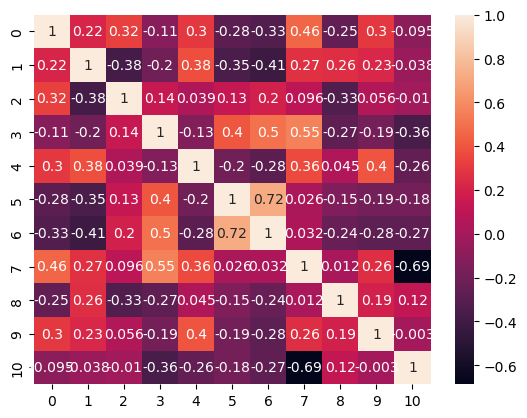

In [19]:
V = np.cov(zscores.T)
sn.heatmap(V, annot=True)

## step 3 compute the eigenvectors and eigenvalues of the covariance matrix to identify principle components


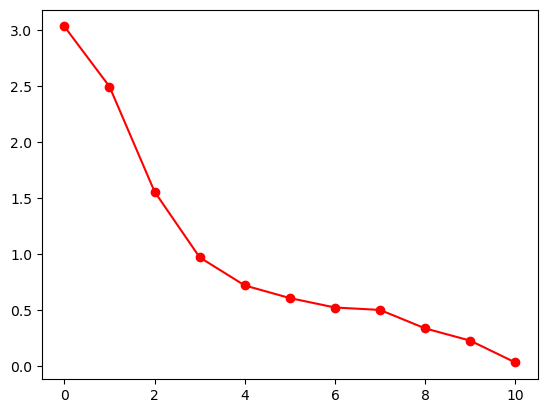

In [27]:
eigenvalues, eigenvectors = np.linalg.eigh(V)
#sorting the eigenvalues
order = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[order]
eigenvectors = eigenvectors[:, order]

# 'Scree' plot of eigenvalues
plt.plot(eigenvalues, 'ro-')
plt.show()

## step 5

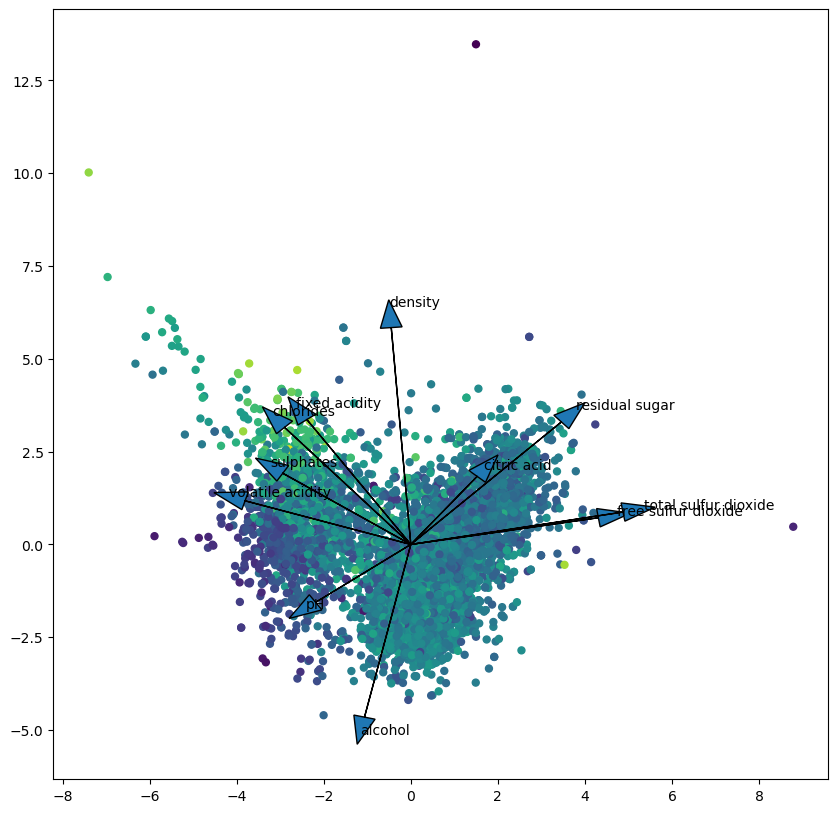

In [41]:
variables = df.columns[1:12]
projections = np.dot(zscores, eigenvectors)
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(projections[:,0], projections[:,1], c=projections[:, 2], s=25)
for var, (x,y) in zip(variables, 10*eigenvectors[:, :2]):
    plt.arrow(0, 0, x, y, head_width=0.5)
    plt.text(1.1*x, 1.1*y, var)
plt.show()